<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/thermodynamics/CO2reactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
#https://reaktoro.org/installation/installation-in-google-colab.html
!pip install -q condacolab
import condacolab
condacolab.install_from_url("https://repo.anaconda.com/miniconda/Miniconda3-py38_4.12.0-Linux-x86_64.sh")
!conda config --remove channels defaults
!conda config --add channels conda-forge
!conda install reaktoro -y

# Litterature

* [Nitric and Sulfuric Acid Solubility in Dense Phase CO2](https://pubs.acs.org/doi/10.1021/acs.iecr.9b04957)

* [Predict formation of strong acids in CO2 Transportation by applying OLI Systems desktop and cloud solutions](https://www.olisystems.com/resources/blog/predict-formation-of-strong-acids-in-co2-transportation-by-applying-oli-systems-desktop-and-cloud-solutions/)



#Reactoro Calculations

# Chemical Equilibrium and Modeling: A Focus on CO2 and Trace Components

Chemical equilibrium is a fundamental concept in chemistry that describes the state where the rates of forward and reverse reactions are equal, resulting in no net change in the concentrations of reactants and products. This state is characterized by a dynamic balance between the opposing reactions. Understanding chemical equilibrium is crucial for predicting the behavior of chemical systems and designing industrial processes, particularly in the context of CO2 capture and storage.

## Chemical Equilibrium: A Dynamic Balance in CO2 Systems

In the context of CO2-containing systems, chemical equilibrium plays a crucial role in determining the fate of CO2 and its interactions with other components. For example, in carbon capture and storage (CCS) technologies, CO2 is captured from industrial sources and stored in geological formations. Understanding the equilibrium behavior of CO2 with various minerals and fluids is essential for ensuring safe and effective storage.

## Modeling Chemical Equilibrium with Reaktoro

`Reaktoro` is a powerful open-source Python library designed for chemical equilibrium calculations. It offers a comprehensive set of tools and functionalities for modeling complex chemical systems, including:

- **Thermodynamic Databases:** `Reaktoro` supports various thermodynamic databases, including the NASA CEA database, which provides thermodynamic properties for a wide range of chemical species relevant to CO2 systems.
- **Chemical System Definition:** Users can define chemical systems by specifying the phases, species, and reactions involved. This flexibility allows for modeling diverse scenarios, from simple gas mixtures to multi-phase systems with complex interactions.
- **Equilibrium Solvers:** `Reaktoro` offers a variety of equilibrium solvers, including Gibbs energy minimization and equilibrium constant-based approaches, to accurately calculate equilibrium compositions.
- **Activity Models:** For non-ideal solutions, `Reaktoro` incorporates activity models like the Peng-Robinson equation of state to account for deviations from ideal behavior, particularly relevant for CO2-rich systems.

## CO2 and Trace Components: Importance of Equilibrium Modeling

In many industrial processes and environmental scenarios, CO2 is present alongside trace components, such as H2S, SO2, and NOx. These trace components can significantly influence the equilibrium behavior of CO2 and the overall system properties.

`Reaktoro` enables comprehensive modeling of CO2 systems with trace components, allowing for:

- **Prediction of Trace Component Behavior:** `Reaktoro` can calculate the equilibrium concentrations of trace components in CO2 streams, providing insights into their fate and potential impacts.
- **Corrosion Assessment:** By modeling the equilibrium between CO2, trace components, and materials, `Reaktoro` can help assess corrosion risks in industrial equipment.
- **Environmental Impact Analysis:** `Reaktoro` can be used to predict the environmental consequences of CO2 emissions, including the formation of acid rain and the impact on water quality.

# Example calculations
In the following calculation we we will do a calculations to see effect of exxess or limited oxygen.

In [7]:
from reaktoro import *
import numpy as np
import pandas as pd
import math as math

from reaktoro import *

db = NasaDatabase("nasa-cea")

gases = GaseousPhase("CO2 H2O H2S SO2 NO2 NO O2 H2 CO CH4 N2 H2SO4 CH3COOH N2O HNO3 NO3 N2O5 HNO3 S8")
#gases.set(ActivityModelPengRobinson())

system = ChemicalSystem(db, gases)

state = ChemicalState(system)
state.temperature(30, "celsius")
state.pressure(10, "bar")
state.set("CO2", 1, "mol")
state.set("N2", 100e-6, "mol")
state.set("O2", 30e-6, "mol")
state.set("H2O", 20e-6, "mol")
state.set("H2S", 10e-6, "mol")
state.set("NO2",  5e-6, "mol")
state.set("SO2",  5e-6, "mol")
#state.set("NO",  5e-6, "mol")

print("=== INITIAL STATE ===")
print(state)

solver = EquilibriumSolver(system)
solver.solve(state)  # equilibrate the `state` object!

print("=== FINAL STATE ===")
print(state)

=== INITIAL STATE ===
+----------------------+------------+------+
| Property             |      Value | Unit |
+----------------------+------------+------+
| Temperature          |   303.1500 |    K |
| Pressure             |    10.0000 |  bar |
| Charge:              | 0.0000e+00 |  mol |
| Element Amount:      |            |      |
| :: H                 | 6.0000e-05 |  mol |
| :: C                 | 1.0000e+00 |  mol |
| :: N                 | 2.0500e-04 |  mol |
| :: O                 | 2.0001e+00 |  mol |
| :: S                 | 1.5000e-05 |  mol |
| Species Amount:      |            |      |
| :: CO2               | 1.0000e+00 |  mol |
| :: H2O               | 2.0000e-05 |  mol |
| :: H2S               | 1.0000e-05 |  mol |
| :: SO2               | 5.0000e-06 |  mol |
| :: NO2               | 5.0000e-06 |  mol |
| :: NO                | 1.0000e-16 |  mol |
| :: O2                | 3.0000e-05 |  mol |
| :: H2                | 1.0000e-16 |  mol |
| :: CO                | 1.0000e-

#NeqSim calculations

## NeqSim Calculations: Simulating Thermodynamic Properties

This section focuses on utilizing the NeqSim library in Python to perform thermodynamic calculations for fluid systems relevant to CO2 and associated components.

### Introduction to NeqSim

NeqSim is a process simulation tool developed by Equinor that provides a comprehensive framework for thermodynamic and process calculations. It offers a wide range of functionalities, including:

- **Thermodynamic Models:** NeqSim supports various equations of state (EOS) and activity coefficient models for accurately representing fluid behavior.
- **Phase Equilibrium Calculations:** It enables the calculation of phase equilibria, including vapor-liquid, liquid-liquid, and solid-liquid equilibria.
- **Fluid Property Calculations:** NeqSim can calculate various fluid properties, such as density, viscosity, enthalpy, and entropy.
- **Process Simulation:** It allows for the simulation of complex processes, including distillation, absorption, and heat transfer.

### NeqSim in This Notebook

In this notebook, NeqSim is primarily used to:

1. **Simulate CO2-rich fluids:** NeqSim is employed to model the behavior of CO2-containing fluids, including mixtures with trace components like H2S, SO2, and NOx.
2. **Calculate phase equilibria:** TPflash calculations are performed to determine the equilibrium compositions of different phases in the fluid system.
3. **Predict sulfuric acid concentration:** NeqSim is used to simulate the distribution of sulfuric acid in CO2 streams, providing insights into its potential impacts on corrosion and environmental processes.
4. **Analyze electrolyte systems:** The Electrolyte-CPA-EoS model in NeqSim is used to simulate systems containing electrolytes, such as acetic acid and water, and to calculate properties like pH.

# Example sulfuric acid solubility in CO2

In [5]:
%%capture
!pip install neqsim

In [8]:
H2SO4_concentration = state.speciesAmount("H2SO4")
HNO3_concentration = state.speciesAmount("HNO3")
CO2_concentration = state.speciesAmount("CO2")
N2_concentration = state.speciesAmount("N2")
O2_concentration = state.speciesAmount("O2")
H2O_concentration = state.speciesAmount("H2O")
H2S_concentration = state.speciesAmount("H2S")
SO2_concentration = state.speciesAmount("SO2")
S8_concentration = state.speciesAmount("S8")

# Print the variables to verify
print("=== EQUILIBRIUM CONCENTRATIONS ===")
print(f"H2SO4: {H2SO4_concentration} mol")
print(f"HNO3: {HNO3_concentration} mol")
print(f"CO2: {CO2_concentration} mol")
print(f"N2: {N2_concentration} mol")
print(f"O2: {O2_concentration} mol")
print(f"H2O: {H2O_concentration} mol")
print(f"H2S: {H2S_concentration} mol")
print(f"SO2: {SO2_concentration} mol")
print(f"S8: {S8_concentration} mol")

=== EQUILIBRIUM CONCENTRATIONS ===
H2SO4: 1.50000000008068e-05 mol
HNO3: 1e-16 mol
CO2: 0.9999999999999999 mol
N2: 0.00010249999999982833 mol
O2: 1.2499999999704611e-05 mol
H2O: 1.499999999919329e-05 mol
H2S: 1e-16 mol
SO2: 1e-16 mol
S8: 1e-16 mol


In the follwoing calculation we will calculate gas, liquid and solid equailibrium. Potential solid phase will be elemental sulfur.

In [9]:
from neqsim.thermo import TPflash, TPsolidflash, fluid, fluid_df, addOilFractions, printFrame, dataFrame, fluidcreator,createfluid,createfluid2, TPflash, phaseenvelope, calcIonComposition
import pandas as pd

fluid1 = fluid('pr')
fluid1.addComponent("sulfuric acid", H2SO4_concentration)
fluid1.addComponent("CO2", CO2_concentration)
fluid1.addComponent("nitrogen", N2_concentration)
fluid1.addComponent("H2S", H2S_concentration)
fluid1.addComponent("SO2", SO2_concentration)
fluid1.addComponent("oxygen", O2_concentration)
fluid1.addComponent("water", H2O_concentration)
fluid1.addComponent("S8", S8_concentration)
fluid1.setMixingRule('classic')
fluid1.setMultiPhaseCheck(True)
fluid1.setSolidPhaseCheck("S8")

fluid1.setTemperature(25.0, "C")
fluid1.setPressure(10.0, "bara")

TPsolidflash(fluid1)
printFrame(fluid1)

| 0                    | 1           | 2           | 3           | 4   | 5   | 6               |
|:---------------------|:------------|:------------|:------------|:----|:----|:----------------|
|                      | total       | GAS         | AQUEOUS     |     |     |                 |
| sulfuric acid        | 1.49978E-5  | 2.52932E-8  | 9.95058E-1  |     |     | [mole fraction] |
| CO2                  | 9.99855E-1  | 9.9987E-1   | 3.51465E-3  |     |     | [mole fraction] |
| nitrogen             | 1.02485E-4  | 1.02487E-4  | 7.29041E-8  |     |     | [mole fraction] |
| H2S                  | 9.99855E-17 | 9.99865E-17 | 3.13992E-17 |     |     | [mole fraction] |
| SO2                  | 9.99855E-17 | 9.99849E-17 | 1.42888E-16 |     |     | [mole fraction] |
| oxygen               | 1.24982E-5  | 1.24984E-5  | 3.84873E-8  |     |     | [mole fraction] |
| water                | 1.49978E-5  | 1.49766E-5  | 1.42763E-3  |     |     | [mole fraction] |
| S8                   | 9.998

In the following calculation we will look into solubility of sulfuric acid in CO2 at 25C.

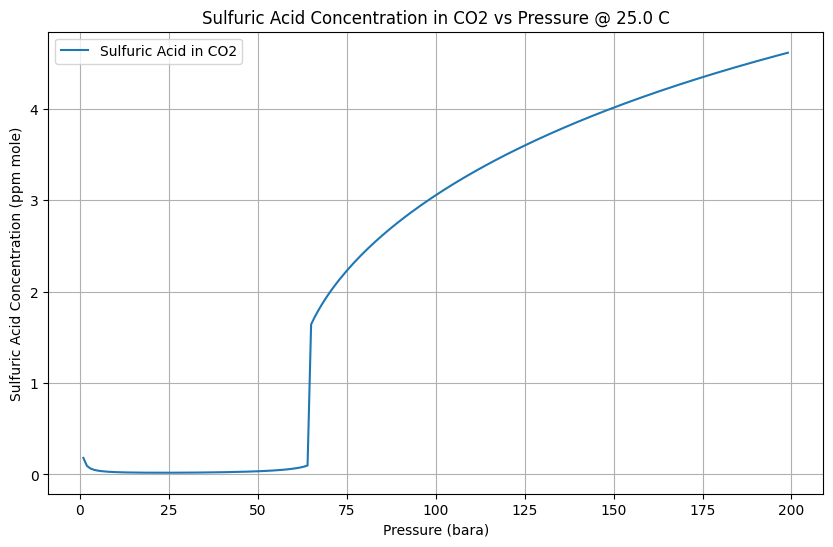

In [17]:
import neqsim.thermo.thermoTools as thermoTools

# Create fluid with NeqSim
fluid1 = thermoTools.fluid('pr')
fluid1.addComponent("sulfuric acid", 10000.0e-9)
fluid1.addComponent("CO2", 1.0)
fluid1.addComponent("nitrogen", 0.000001)
fluid1.addComponent("H2S", 0.000001)
fluid1.addComponent("SO2", 0.000001)
fluid1.addComponent("oxygen", 0.000001)
fluid1.addComponent("NO2", 0.0000001)
fluid1.addComponent("CO", 0.000001)
fluid1.addComponent("water", 1.0e-6)
fluid1.setMixingRule('classic')
fluid1.setMultiPhaseCheck(True)
fluid1.setTemperature(25.0, "C")

# Simulate and collect data
pressures = []
ppmSulfuric_acid_in_CO2 = []

for pres in range(1, 200):
    fluid1.setPressure(pres, "bara")
    thermoTools.TPflash(fluid1)
    # Get sulfuric acid concentration in the gas phase (phase 0)
    sulfuric_acid_concentration = (
        fluid1.getPhase(0).getComponent('sulfuric acid').getx() * 1e6
    )
    pressures.append(pres)
    ppmSulfuric_acid_in_CO2.append(sulfuric_acid_concentration)

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(pressures, ppmSulfuric_acid_in_CO2, label='Sulfuric Acid in CO2')
plt.xlabel('Pressure (bara)')
plt.ylabel('Sulfuric Acid Concentration (ppm mole)')
temperature = fluid1.getTemperature('C')
plt.title(f'Sulfuric Acid Concentration in CO2 vs Pressure @ {temperature} C')
plt.grid()
plt.legend()
plt.show()


In the following calculation we will look into solubility of HNO3 in CO2 at 25C.

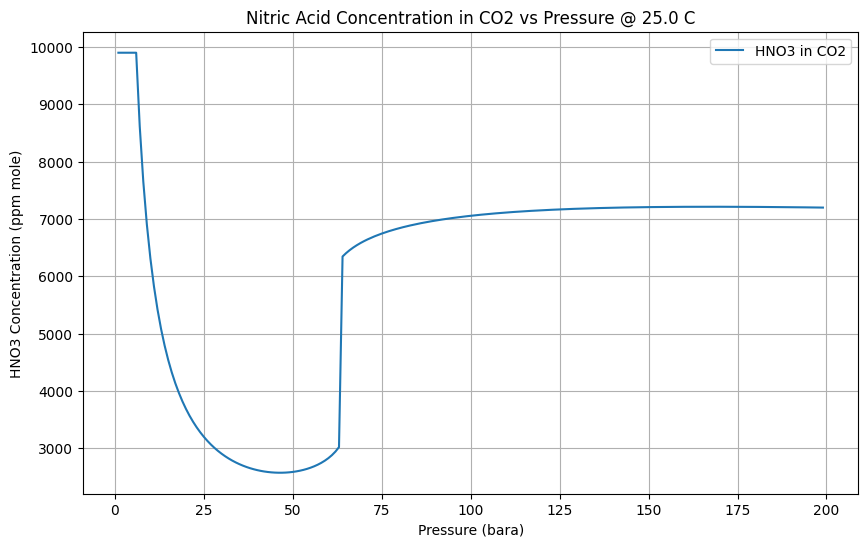

In [16]:
import neqsim.thermo.thermoTools as thermoTools

# Create fluid with NeqSim
fluid1 = thermoTools.fluid('pr')
fluid1.addComponent("nitric acid", 1.0)
fluid1.addComponent("CO2", 100.0)
fluid1.setMixingRule('classic')
fluid1.setMultiPhaseCheck(True)
fluid1.setTemperature(25.0, "C")

# Simulate and collect data
pressures = []
ppmSulfuric_acid_in_CO2 = []

for pres in range(1, 200):
    fluid1.setPressure(pres, "bara")
    thermoTools.TPflash(fluid1)
    # Get sulfuric acid concentration in the gas phase (phase 0)
    sulfuric_acid_concentration = (
        fluid1.getPhase(0).getComponent('nitric acid').getx() * 1e6
    )
    pressures.append(pres)
    ppmSulfuric_acid_in_CO2.append(sulfuric_acid_concentration)

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(pressures, ppmSulfuric_acid_in_CO2, label='HNO3 in CO2')
plt.xlabel('Pressure (bara)')
plt.ylabel('HNO3 Concentration (ppm mole)')
temperature = fluid1.getTemperature('C')
plt.title(f'Nitric Acid Concentration in CO2 vs Pressure @ {temperature} C')
plt.grid()
plt.legend()
plt.show()


# Exmample calculation using the CPA electrolyte equation of state
The electroly EoS can be used to stdy effects of chemical reactions in the water phase and calculate pH.

In [18]:
from neqsim.thermo import TPflash, fluid, fluid_df, addOilFractions, printFrame, dataFrame, fluidcreator,createfluid,createfluid2, TPflash, phaseenvelope, calcIonComposition
import pandas as pd

fluid1 = fluid('Electrolyte-CPA-EoS')
fluid1.addComponent("sulfuric acid", 3.0e-6)
fluid1.addComponent("CO2", 100.0)
fluid1.addComponent("nitrogen", 0.0001)
fluid1.addComponent("H2S", 0.0001)
fluid1.addComponent("SO2", 0.0001)
fluid1.addComponent("oxygen", 0.0001)
fluid1.addComponent("NO2", 0.0001)
fluid1.addComponent("CO", 0.0001)
fluid1.addComponent("acetic acid", 1.0e-6)
fluid1.addComponent("water", 1.0e-4)

fluid1.chemicalReactionInit()
fluid1.setMixingRule(10)

fluid1.setTemperature(55.0, "C")
fluid1.setPressure(15.0, "bara")

TPflash(fluid1)
printFrame(fluid1)
print('pH of water phase ', fluid1.getPhase('aqueous').getpH())

| 0                    | 1           | 2                           | 3                           | 4   | 5   | 6               |
|:---------------------|:------------|:----------------------------|:----------------------------|:----|:----|:----------------|
|                      | total       | GAS                         | AQUEOUS                     |     |     |                 |
| sulfuric acid        | 4.36406E-3  | 5.78427E-3                  | 4.45134E-4                  |     |     | [mole fraction] |
| CO2                  | 7.25031E-11 | 9.86078E-11                 | 4.69721E-13                 |     |     | [mole fraction] |
| nitrogen             | 1.45469E-1  | 1.98175E-1                  | 3.01936E-5                  |     |     | [mole fraction] |
| H2S                  | 8.51975E-5  | 1.15338E-4                  | 2.02751E-6                  |     |     | [mole fraction] |
| SO2                  | 1.45469E-1  | 1.96558E-1                  | 4.4924E-3                   